#  Analysis of anime data — Plan
 
## 1. Analysis of missing data and duplicates 
- Checking which columns contain missing values and how many there are.
- Visual representation of missing data to see its distribution in the dataset.
- Determine a strategy for dealing with missing values—e.g., delete records, impute values, or leave gaps.
- Identify duplicates in the dataset and determine how to deal with them.

---

## 2. Descriptive statistics

### 2.1 Numerical columns
- Statistical summary (mean, median, min, max, quartiles).


### 2.2 Categorical columns
- Determining the number of unique values in categorical columns.
- Indicating the most frequently occurring categories.

---

## 3. Score distribution (`score`)
- Examining how scores are distributed across the entire set.
- Comparing score distribution depending on anime type.
- Analyzing differences in mean and median scores for different groups.

---

## 4. Analysis of trends over time
- Checking how many new anime appeared in subsequent years.
- Analyzing how average ratings changed over the years.
- Detecting possible increases or decreases in popularity and quality.

---

## 5. Analysis of genres (`genres`)
- Identification of the most common genres.
- Comparison of average ratings across different genres.
- Identification of the dominant genres in the collection.

---

## 6. Analysis of series length (`episodes`)
- Checking the relationship between the number of episodes and the rating.
- Detecting exceptionally long or short series.
- Analyzing whether the length of a series affects its popularity and rating.

---

## 7. Analysis of relationships between variables
- Calculation of correlations between numerical variables.
- Visualization of the strength and direction of relationships.
- Identification of variables most strongly associated with grades.

---

## 8. “Top 10” visualizations
- List of the highest-rated anime.
- List of the most common genres.
- Summaries in the form of rankings.


## 9. Summary and conclusions
- Indication of the most important findings from the analysis.
- Discussion of observed trends and relationships.
- Formulation of recommendations or directions for further research.


### ***Importing the appropriate libraries***

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter 

***Loading data and presenting it with column descriptions and type definitions***

In [2]:
# Loading data
df = pd.read_csv("/kaggle/input/user-animelist-dataset/animes.csv")

In [3]:
# Data presentation and column descriptions
df.head(10)

,animeID,title,alternative_title,type,year,score,episodes,mal_url,sequel,image_url,genres,genres_detailed
0,1,Howl's Moving Castle,Howl no Ugoku Shiro,MOVIE,2004,8.41,1,https://myanimelist.net/anime/431,False,https://cdn.myanimelist.net/images/anime/1470/...,"['Adventure', 'Award Winning', 'Drama', 'Fanta...","['action', 'adventure', 'age gap', 'air force'..."
1,2,Death Note,NaN,TV,2006,8.63,37,https://myanimelist.net/anime/1535,False,https://cdn.myanimelist.net/images/anime/1079/...,"['Supernatural', 'Suspense']","['achronological order', 'acting', 'adapted in..."
2,3,Problem Children Are Coming from Another World...,Mondaiji-tachi ga Isekai kara Kuru Sou desu yo?,TV,2013,7.42,10,https://myanimelist.net/anime/15315,False,https://cdn.myanimelist.net/images/anime/12/43...,"['Action', 'Comedy', 'Fantasy']","['action', 'alternative world', 'anthropomorph..."
3,4,BTOOOM!,Btooom!,TV,2012,7.34,12,https://myanimelist.net/anime/14345,False,https://cdn.myanimelist.net/images/anime/4/409...,"['Action', 'Sci-Fi', 'Suspense']","['achronological order', 'action', 'adventure'..."
4,5,Sword Art Online,NaN,TV,2012,7.5,25,https://myanimelist.net/anime/11757,False,https://cdn.myanimelist.net/images/anime/11/39...,"['Action', 'Adventure', 'Fantasy', 'Romance']","['action', 'action drama', 'adventure', 'alter..."
5,6,Spirited Away,Sen to Chihiro no Kamikakushi,MOVIE,2001,8.64,1,https://myanimelist.net/anime/199,False,https://cdn.myanimelist.net/images/anime/6/795...,"['Adventure', 'Award Winning', 'Fantasy']","['adventure', 'alternative world', 'anthropomo..."
6,7,Princess Mononoke,Mononoke Hime,MOVIE,1997,8.59,1,https://myanimelist.net/anime/164,False,https://cdn.myanimelist.net/images/anime/1355/...,"['Action', 'Adventure', 'Award Winning', 'Fant...","['action', 'adventure', 'against destiny', 'an..."
7,8,Magi: The Labyrinth of Magic,NaN,TV,2012,8,25,https://myanimelist.net/anime/14513,False,https://cdn.myanimelist.net/images/anime/11/42...,"['Action', 'Adventure', 'Fantasy']","['action', 'adventure', 'against destiny', 'al..."
8,9,Accel World,NaN,TV,2012,7.31,24,https://myanimelist.net/anime/11759,False,https://cdn.myanimelist.net/images/anime/1002/...,"['Action', 'Romance', 'Sci-Fi']","['action', 'alternative world', 'antihero', 'a..."
9,10,Eden of The East,Higashi no Eden,TV,2009,7.81,11,https://myanimelist.net/anime/5630,False,https://cdn.myanimelist.net/images/anime/9/150...,"['Award Winning', 'Mystery', 'Romance', 'Sci-F...","['action', 'adult cast', 'adventure', 'alterna..."


## Column description:
* **animeID – Unique anime identifier.**
* **title – Main anime title.**
* **alternative_title – Alternative title (e.g., in Japanese).**
* **type – Anime type (e.g., TV, Movie, OVA).**
* **year – Year of release.**
* **score – Average user rating (e.g., from MyAnimeList).**
* **episodes – Number of episodes.**
* **mal_url – Link to the anime's profile on MyAnimeList.**
* **sequel – Does the anime have a sequel (True/False).**
* **image_url – Link to the anime image/poster.**
* **genres – List of main genres.**
* **genres_detailed – Detailed tags and story themes.**

In [4]:
# Presentation of data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   animeID            20237 non-null  int64 
 1   title              20237 non-null  object
 2   alternative_title  8676 non-null   object
 3   type               20237 non-null  object
 4   year               20237 non-null  object
 5   score              20237 non-null  object
 6   episodes           20237 non-null  int64 
 7   mal_url            20237 non-null  object
 8   sequel             20237 non-null  bool  
 9   image_url          20237 non-null  object
 10  genres             20237 non-null  object
 11  genres_detailed    20237 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 1.7+ MB


***Changing data types to adapt them for further analysis***

In [5]:
# First, we need to change the data types to obtain reliable results later on.
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df.dtypes
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genres_detailed'] = df['genres_detailed'].apply(ast.literal_eval)

***Presentation of the modified types***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20237 entries, 0 to 20236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   animeID            20237 non-null  int64  
 1   title              20237 non-null  object 
 2   alternative_title  8676 non-null   object 
 3   type               20237 non-null  object 
 4   year               20101 non-null  Int64  
 5   score              19644 non-null  float64
 6   episodes           20237 non-null  int64  
 7   mal_url            20237 non-null  object 
 8   sequel             20237 non-null  bool   
 9   image_url          20237 non-null  object 
 10  genres             20237 non-null  object 
 11  genres_detailed    20237 non-null  object 
dtypes: Int64(1), bool(1), float64(1), int64(2), object(7)
memory usage: 1.7+ MB


In [7]:
# Displaying changed types for genres and genres_detailed in Python lists
df[['genres', 'genres_detailed']].sample(8)

,genres,genres_detailed
17733,[Avant Garde],"[abstract, avant garde, dementia, no dialogue,..."
5837,"[Comedy, Romance]","[angst, asia, based on a manga, battle of wits..."
7318,"[Comedy, Suspense]","[based on a manga, comedy, episodic, female pr..."
17728,[Drama],"[drama, educational, historical]"
6387,"[Drama, Romance]","[drama, female protagonist, foreign, historica..."
5397,"[Comedy, Fantasy]","[adventure, alternative world, ancient china, ..."
764,"[Action, Mystery, Supernatural]","[action, adult cast, america, anti-hero, based..."
14031,"[Action, Adventure, Drama, Romance]","[action, adventure, air combat, air force, avi..."


## 1. Analysis of missing data and duplicates

In [8]:
# Checking for missing data
df.isna().sum()

animeID                  0
title                    0
alternative_title    11561
type                     0
year                   136
score                  593
episodes                 0
mal_url                  0
sequel                   0
image_url                0
genres                   0
genres_detailed          0
dtype: int64

In [9]:
# Summary of missing data in the form of a DataFrame and percentage share
# in relation to the total number of records
missing_data = df.isna().sum().to_frame("Missing Cout")
missing_data['Missing [%]'] = ((missing_data['Missing Cout']/ len(df)) * 100) 
missing_data

,Missing Cout,Missing [%]
animeID,0,0.000000
title,0,0.000000
alternative_title,11561,57.128033
type,0,0.000000
year,136,0.672036
score,593,2.930276
episodes,0,0.000000
mal_url,0,0.000000
sequel,0,0.000000
image_url,0,0.000000


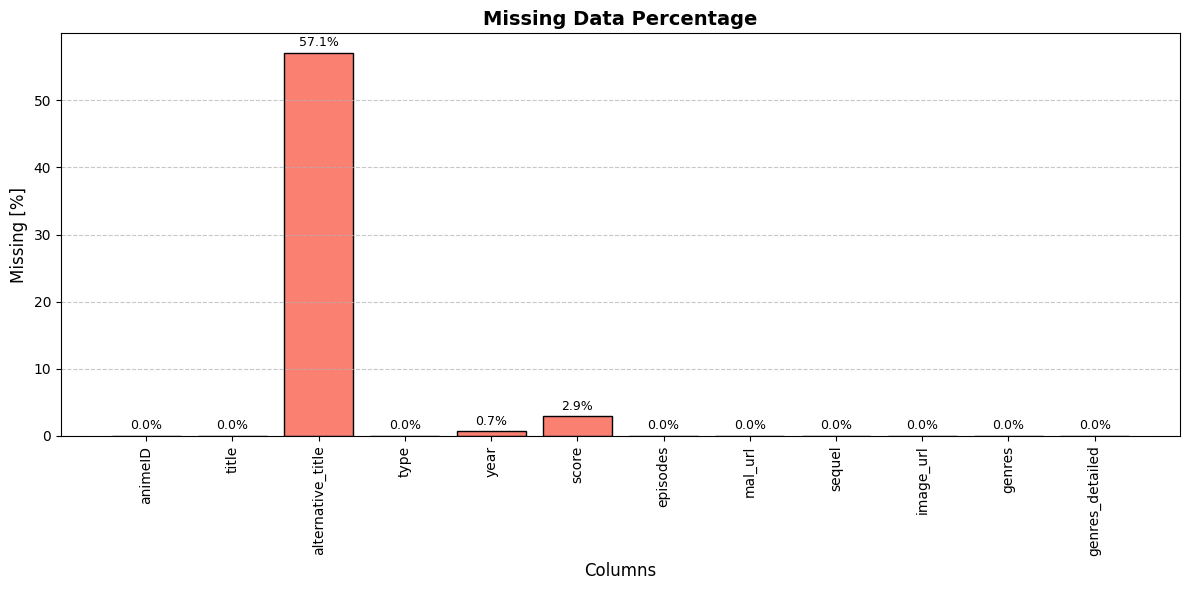

In [10]:
# Displaying missing data in a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_data.index, missing_data['Missing [%]'].values, color='salmon', edgecolor='black') 
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.xticks(rotation=90)
plt.title("Missing Data Percentage", fontsize=14, fontweight='bold')
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Missing [%]", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Strategy for dealing with missing data

### 1. Filling in gaps in text columns
- **Column:** `alternative_title`
- **Action:** Replace the value `NaN` with the constant label `“No_information”`.
- **Goal:** Preserve all records and explicitly mark missing data.

---

### 2. Filling in gaps in numeric columns
- **Column:** `year`
- Replace missing values with `0` (indicates no information about the year).
- **Column:** `score`
- Replace missing values with `0.0` (enables further calculations).

---

### 3. Removing unnecessary columns for further analysis
- **Columns:** `mal_url`, `image_url`
- **Action:** Removal from the data frame.
- **Purpose:** To reduce the size of the dataset and increase the transparency of the analysis.

***Cleaning up missing data and removing unnecessary columns for further analysis***

In [11]:

# alternative title replace NAN values with missing data information, year replace NAN values with zero, score replace NAN values with zero
df_analize = df['alternative_title'] = df['alternative_title'].fillna('No_information')
df_analize = df['year'] = df['year'].fillna(0)
df_analize = df['score'] = df['score'].fillna(0.0)
# removal of columns that will not be needed for analysis
df_analize = df.drop(columns=['mal_url', 'image_url'])

In [12]:
# Presentation of data and data types after cleaning
df_analize.sample(10)

,animeID,title,alternative_title,type,year,score,episodes,sequel,genres,genres_detailed
17730,17731,Blazing Teens 4,Huoli Shaonian Wang 3: Xuji,TV,2012,6.56,26,False,[Drama],"[chinese animation, family friendly, fantasy, ..."
10930,10931,Slave Princess Olivia,Himekishi Olivia,OVA,2013,5.84,2,False,[Hentai],"[adult audience only, alternative world, dark ..."
9551,9552,Case File nº221: Kabukicho OVA,Kabukichou Sherlock OVA,OVA,2020,6.69,6,False,"[Comedy, Drama, Mystery]","[adult cast, bar, based on a novel, classic li..."
2772,2773,Hozuki's Coolheadedness,Hoozuki no Reitetsu,TV,2014,7.62,13,False,"[Comedy, Fantasy]","[afterlife, alcohol, animeism, asia, based on ..."
18229,18230,Fuji Lieren,No_information,ONA,2024,0.00,12,False,[Action],"[action, chinese animation]"
6734,6735,The Thousand Noble Musketeers,Senjuushi,TV,2018,4.67,12,False,[Action],"[action, anthropomorphic, based on a mobile ga..."
3448,3449,Nurse Witch Komugi,Nurse Witch Komugi-chan Magikarte,OVA,2002,6.77,5,False,"[Comedy, Fantasy]","[absurdist humour, action, asia, beach visit, ..."
18514,18515,Ninja Tamamaru,No_information,TV,2008,0.00,26,False,[Adventure],"[comedy, family friendly, kids, martial arts, ..."
15210,15211,Little Miss Akane,Akane-chan,TV,1968,5.36,26,False,"[Comedy, Slice of Life]","[achromatic, asia, based on a manga, black and..."
3771,3772,Powerpuff Girls Z,Demashita! Powerpuff Girls Z,TV,2006,6.52,52,False,[Action],"[acting, action, action comedy, adventure, age..."


## 1. Analysis of missing data — conclusions

In the dataset, missing values occur mainly in the **`alternative_title`** column and, to a lesser extent, in **`year`** and **`score`**.  
The gaps in `alternative_title` are not particularly significant for further analysis, as this is an auxiliary column.  

In the case of the `year` and `score` columns, which are key to studying trends over time and ratings, **I decided not to remove records with gaps** in order to avoid losing data. However, in further analysis, it should be remembered that some of the graphs and calculations will be based only on a subset of records with complete values, while omitting **`NaN`** values to avoid inconsistencies.  

To compensate for the missing values, I introduced substitute values: for the **`alternative_title`** column, I used `No_information`, while for `year` and `score`, I used `0` and `0.0`, respectively.  
It is important to note that these values serve only as **placeholders** and do not constitute real data — therefore, they should be treated with caution and filtered appropriately in further analyses.  

Additionally, to simplify further analysis, the **`mal_url`** and **`image_url`** columns, which were of little analytical significance, were removed. However, I decided to leave the **`alternative_title`** column, because after preliminary analysis, it turned out that it could be useful for distinguishing between certain series when the main titles are repeated.



### **Checking for duplicates**

#### ***Description***: The goal is to determine whether there are duplicate records in the data.

In [13]:
# Checking for duplicates
print(f"Are there duplicates in the animeID column: {df_analize['animeID'].duplicated().sum()}, and in the title column: {df_analize['title'].duplicated().sum()}")



Are there duplicates in the animeID column: 0, and in the title column: 190


In [14]:
# We are looking for unique titles that are repeated
duplikaty_lista = df_analize['title'][df_analize['title'].duplicated()].unique()

# Filter only rows with duplicates
tabela_duplikatow = df_analize[df_analize['title'].isin(duplikaty_lista)]

# Sort by title
tabela_duplikatow = tabela_duplikatow.sort_values(by=['title'])

# Copy titles to new column
tabela_duplikatow['duplicated_titles'] = tabela_duplikatow['title']

# Display selected columns for comparison
print(tabela_duplikatow[['title', 'alternative_title', 'sequel', 'type']])


                 title             alternative_title  sequel     type
20131   After the Rain                  Rakugakisama   False  SPECIAL
2380    After the Rain     Koi wa Ameagari no You ni   False       TV
1122      Aldnoah.Zero           Aldnoah.Zero Part 2    True       TV
1094      Aldnoah.Zero                No_information   False       TV
3931       Angel Tales  Otogi Story Tenshi no Shippo   False       TV
...                ...                           ...     ...      ...
9272   World Fool News          World Fool News (TV)   False       TV
18272           Zephyr                No_information   False  SPECIAL
15742           Zephyr                   Kaze no Sei   False    MOVIE
2124       Zombie-Loan                No_information   False       TV
2578       Zombie-Loan          Zombie-Loan Specials   False  SPECIAL

[359 rows x 4 columns]


## Strategy for dealing with duplicates

There are duplicates in the **`title`** column in the analyzed data.  
It was decided to **leave them without removing them** because:

- They may represent **different seasons** of the same anime series.
- They may refer to **other types** of series (e.g., TV, OVA, movie).
- They may indicate **sequels or spin-offs** (e.g., `sequel`).
- They may differ in **alternative titles** or production details.

Deleting such records could lead to the loss of important information about the structure and relationships within the series.


## 2. Descriptive statistics

### 2.1 Numeric columns

In [15]:
# Descriptive statistics for numeric columns containing significant numerical data, we use df 
# to avoid errors related to substituting NaN with the value 0.
# For statistical analysis purposes, we will remove empty values in the ‘year’, ‘score,’ and ‘episodes’ columns.
df_stat = df.dropna(subset=['year', 'score', 'episodes'])
df_stat.isna().sum()


animeID              0
title                0
alternative_title    0
type                 0
year                 0
score                0
episodes             0
mal_url              0
sequel               0
image_url            0
genres               0
genres_detailed      0
dtype: int64

In [16]:
# To compare columns of numbers without removing empty values
df[['year', 'score', 'episodes']].describe()

,year,score,episodes
count,20237.0,20237.000000,20237.000000
mean,1995.29708,6.130525,12.746949
std,164.781151,1.460249,61.209654
min,0.0,0.000000,0.000000
25%,2003.0,5.540000,1.000000
50%,2013.0,6.300000,2.000000
75%,2019.0,7.020000,12.000000
max,2027.0,10.000000,3057.000000


In [17]:
# After removing empty values
df_stat[['year', 'score', 'episodes']].describe()

,year,score,episodes
count,20237.0,20237.000000,20237.000000
mean,1995.29708,6.130525,12.746949
std,164.781151,1.460249,61.209654
min,0.0,0.000000,0.000000
25%,2003.0,5.540000,1.000000
50%,2013.0,6.300000,2.000000
75%,2019.0,7.020000,12.000000
max,2027.0,10.000000,3057.000000


In [18]:
# Correlation analysis between numerical columns
df.corr(numeric_only=True)

,animeID,year,score,episodes,sequel
animeID,1.000000,-0.073840,-0.499777,-0.021570,-0.091083
year,-0.073840,1.000000,0.209758,0.004004,-0.116914
score,-0.499777,0.209758,1.000000,0.029049,0.143403
episodes,-0.021570,0.004004,0.029049,1.000000,0.014531
sequel,-0.091083,-0.116914,0.143403,0.014531,1.000000


Summary of descriptive statistics

Analysis of data for the columns `year`, `score`, and `episodes` showed:

- **Data count:** 20,237 records with no missing values in key numeric columns.
- **Year of release (`year`):**  
  - Range: from 0 to 2027 (a value of 0 suggests a missing or erroneous data point).  
  - Median: 2013.  
  - Mean: ~1995.3 (lowered by zero values).
- **Score (`score`):**
- Range: 0–10.  
  - Median: 6.3.  
  - Mean: ~6.13 (moderate spread of scores, std ≈ 1.46).
- **Number of episodes (`episodes`):**  
  - Range: 0–3057 episodes (extreme values indicate long-term series).  
  - Median: 12 episodes.  
  - Mean: ~12.75 (high variance, std ≈ 61.21).

### Correlations between numerical variables
- Strongest positive correlation: **`year` – `score`** (~0.21) → newer series tend to have higher ratings.  
- Strongest negative correlation: **`animeID` – `score`** (~-0.50) → probably an effect of the order in the database, not a causal relationship.  
- The number of episodes (`episodes`) is weakly correlated with the other variables.

### 2.2 Categorical columns

In [19]:
# Analysis of unique values in categorical columns
print(
    "Number of unique values in categorical columns:\n"
    f"title = {df_analize['title'].nunique()},\n"
    f"alternative_title = {df_analize['alternative_title'].nunique()},\n"
    f"type = {df_analize['type'].nunique()},\n"
    f"genres = {df_analize['genres'].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique()},\n"
    f"genres_detailed = {df_analize['genres_detailed'].apply(lambda x: tuple(x) if isinstance(x, list) else x).nunique()}"
)

Number of unique values in categorical columns:
title = 20047,
alternative_title = 8676,
type = 5,
genres = 909,
genres_detailed = 18375


In [20]:
# Most common values in the ‘title’ column
df_analize["title"].value_counts().head(10)
  


title
Spirit Guardians                       5
Meow Meow Japanese History             4
Magical Legend: Rise to Immortality    4
Cyborg 009                             4
Promise                                3
Fight! Kickers                         3
Ling Cage                              3
Outlaw Star                            3
Tenchi Muyo! Ryo-Ohki                  3
Legend of Exorcism                     3
Name: count, dtype: int64

In [21]:
# Most common values in the ‘alternative_title’ column
df_analize['alternative_title'].value_counts().head(10)

alternative_title
No_information                                                      11561
Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian                                2
Dr. Slump Movie 03: Arale-chan Hoyoyo! Sekai Isshuu Dai Race            1
Tetsuwan Atom: Uchuu no Yuusha                                          1
Tiger Mask Fuku Men League Sen                                          1
Kagaku Ninja-tai Gatchaman F                                            1
Mirai Shounen Conan 2: Taiga Daibouken                                  1
Dr. Slump Movie 02: "Hoyoyo!" Uchuu Daibouken                           1
Dr. Slump Movie 05: Arale-chan Hoyoyo! Yume no Miyako Mechapolis        1
Usuzumizakura: Garo                                                     1
Name: count, dtype: int64

In [22]:
# Most common values in the ‘type’ column
df['type'].value_counts().head(10)

type
TV         5766
SPECIAL    4847
OVA        3661
MOVIE      3250
ONA        2713
Name: count, dtype: int64

In [23]:
# Most common species
gatunki = Counter([g for sublist in df_analize['genres'] for g in sublist])
gatunki.most_common(10)

[('Comedy', 6902),
 ('Action', 5387),
 ('Fantasy', 4714),
 ('Adventure', 3709),
 ('Sci-Fi', 3255),
 ('Drama', 2836),
 ('Romance', 2218),
 ('Hentai', 1602),
 ('Supernatural', 1536),
 ('Slice of Life', 1437)]

In [24]:
# Most common detailed genres
# genres_detailed is a more detailed list of genres
genres_detailed = Counter([g for sublist in df_analize['genres_detailed'] for g in sublist])
genres_detailed.most_common(10)

[('japanese production', 11122),
 ('comedy', 10106),
 ('action', 7996),
 ('fantasy', 7400),
 ('present', 7038),
 ('drama', 6140),
 ('adventure', 5664),
 ('place', 5395),
 ('romance', 4949),
 ('based on a manga', 4866)]

### Categorical columns — summary

The analysis of categorical columns focused on the number of unique values and the most frequently occurring categories.  

- **Titles (`title`)**: there are a large number of unique values, which is due to the richness of the database (~20,000 items). Some titles are repeated, which is related to the presence of different seasons, types (TV, OVA, movie), or alternative versions.  
- **Alternative titles (`alternative_title`)**: there are many unique values, but their significance is secondary and they play a supporting role in distinguishing between series.
- **Type (`type`)**: the data includes various forms of anime, most commonly **TV series**, as well as movies, OVAs, and other formats.  
- **Genres (`genres`)**: the database covers a wide variety of genres. The most common genres are action, fantasy, adventure, and comedy.  
- **Detailed genres (`genres_detailed`)**: typically Japanese productions appear most often here, as well as numerous genres related to comedy and action, which dominate this category.   

### Conclusions:
- Categorical data is highly diverse and rich in detail, allowing for in-depth analysis (e.g., genres or production types).  
- TV series are the most common type, and classic genres such as **action**, **fantasy**, and **comedy** remain dominant.
- The large number of unique values in `title` and `alternative_title` confirms the need to keep both columns to avoid incorrect series aggregation.  
- Detailed categories (`genres_detailed`) may be more difficult to analyze collectively, but they provide valuable material for more advanced thematic research.    


## 3. Score distribution

In [25]:
### Correlation analysis between numerical columns for “score”
corr_score = df_analize.corr(numeric_only=True)
corr_score['score']

animeID    -0.499777
year        0.209758
score       1.000000
episodes    0.029049
sequel      0.143403
Name: score, dtype: float64

In [26]:
# top 20 highest-rated anime
top_10_anime= df_analize[['title', 'score']].sort_values(by='score', ascending=False).head(20)
print(top_10_anime)

                                                   title  score
11390  Disney: Twisted-Wonderland The Animation - Epi...   10.0
13454            Nageki no Bourei wa Intai shitai Part 2   10.0
12869  Campfire Cooking in Another World with My Absu...   10.0
15805                                      The One Piece   10.0
9055           Tensei shitara Slime Datta Ken 4th Season   10.0
16255                  Nige Jouzu no Wakagimi 2nd Season   10.0
12769                Boku no Kokoro no Yabai Yatsu Movie   10.0
15892   Kakuriyo: Bed and Breakfast for Spirits Season 2   10.0
13973                                MF Ghost 3rd Season   10.0
16423                 Tokyo Revengers: Santen Sensou-hen   10.0
15893                     May I Ask for One Final Thing?   10.0
8434                                   Omniscient Reader   10.0
12615                       Grand Blue Dreaming Season 2   10.0
16440                       Shangri-La Frontier Season 3   10.0
16456                                Med

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


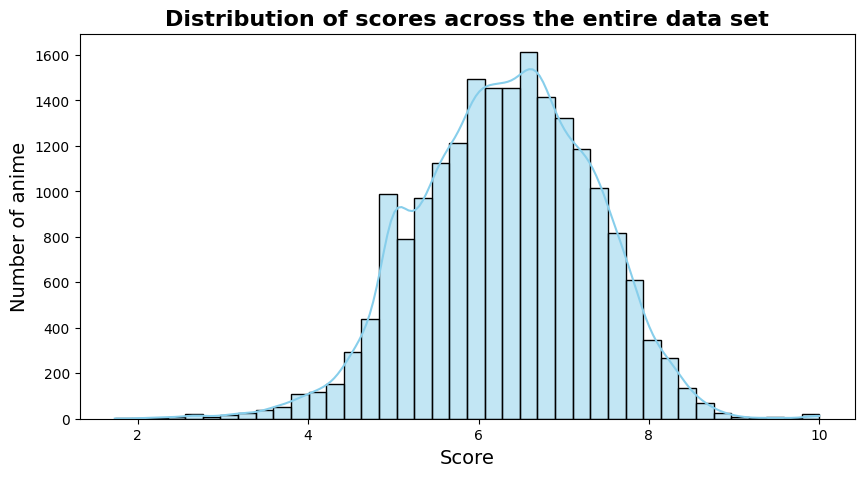

In [27]:
# Visualization of the score distribution
df_score_without_nan = df_analize[df_analize['score'] > 0]


plt.figure(figsize=(10, 5))
sns.histplot(df_score_without_nan['score'], bins = 40, kde=True, color='skyblue') 
plt.title('Distribution of scores across the entire data set', fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=14)
plt.ylabel('Number of anime', fontsize=14)
plt.show()

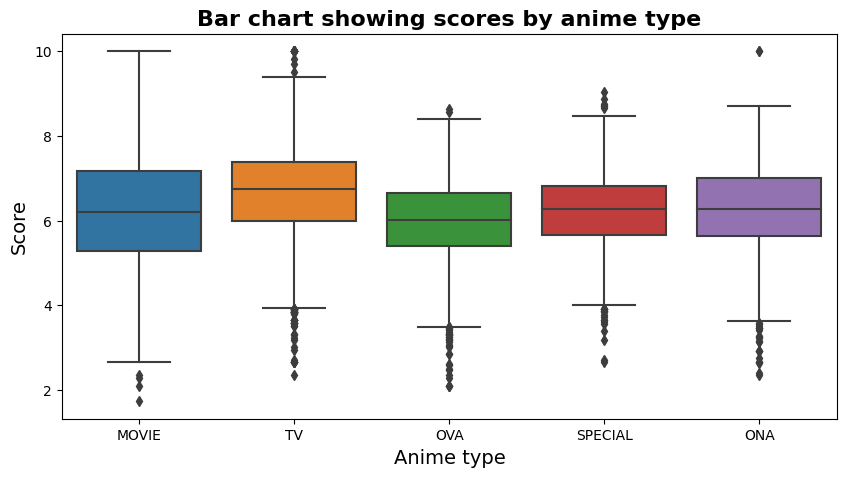

In [28]:
# Bar chart showing scores by anime type
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'type', y = 'score', data = df_score_without_nan)
plt.title('Bar chart showing scores by anime type', fontsize=16, fontweight='bold')
plt.xlabel('Anime type', fontsize=14)
plt.ylabel('Score', fontsize=14)        
plt.show()

In [29]:
# Average and median ratings for different types of anime
score_stats = df_analize.groupby('type')['score'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print(score_stats)

             mean  median  count
type                            
TV       6.448767    6.70   5766
SPECIAL  6.035034    6.24   4847
ONA      6.016734    6.23   2713
MOVIE    6.015237    6.17   3250
OVA      5.942398    6.00   3661


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Award Winning'),
  Text(1, 0, 'Suspense'),
  Text(2, 0, 'Mystery'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Supernatural'),
  Text(7, 0, 'Gourmet'),
  Text(8, 0, 'Girls Love'),
  Text(9, 0, 'Sports')])

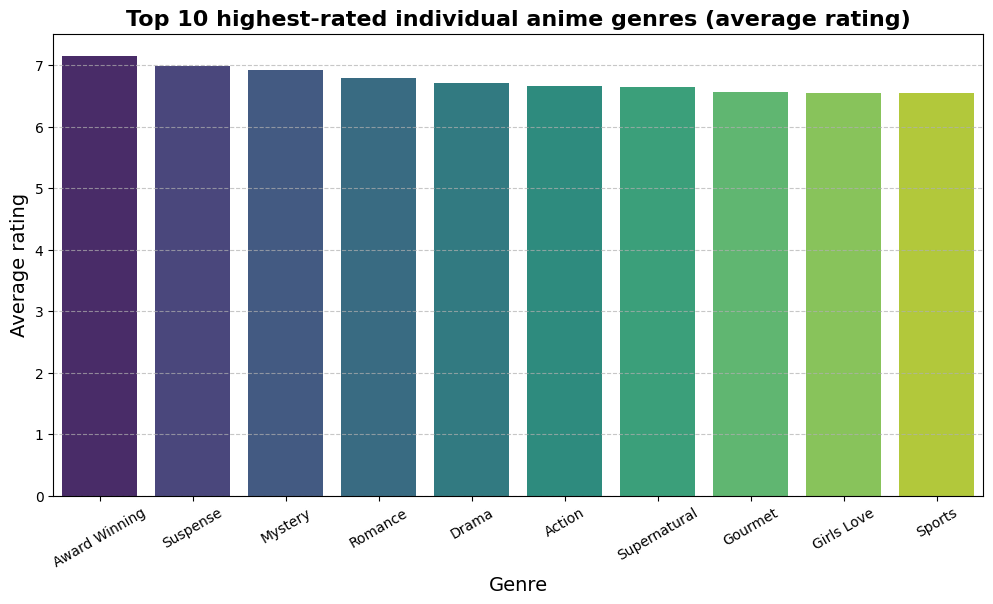

In [30]:
# Bar chart of the 10 highest-rated individual species (average score)

df_unpacked = df_analize.explode('genres')
df_unpacked = df_unpacked[df_unpacked['score'] > 0]

# Calculate the average rating for each individual genre and select the top 10
top10 = (
    df_unpacked.groupby('genres')['score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10.values, palette='viridis')
plt.title('Top 10 highest-rated individual anime genres (average rating)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Average rating', fontsize=14)
plt.xticks(rotation=30)


### Conclusions – Point 3: Score

The distribution of anime ratings shows that **most titles fall within the range of 6.5–7 points**, with extreme values (below 4 or above 9) occurring relatively rarely. The histogram indicates that the distribution resembles a normal distribution shifted upwards – the ratings are generally positive, and there are more titles rated well than poorly in the database.  

Correlation analysis showed **a slight positive relationship between the year of release and the rating (r≈0.20)**. This may suggest that newer productions are rated better, although the relationship is not strong and may also result from older anime being rated more harshly, better availability of new anime, etc.  

The **TOP 20 titles** list includes many productions with a maximum rating of **10.0**, which indicates the presence of exceptional, cult classics.  

### Boxplot – anime types
A comparison of anime types showed significant differences in ratings:
- **TV** – the highest median (~6.7) and a very wide spread of results. TV series include both outstanding and very poor productions.  
- **MOVIE** – they have a relatively large interquartile range (IQR), which means **greater variation in movie ratings**. The median (6.17) is lower than for TV, but the spread of results indicates a wide spectrum of quality.  
- **SPECIAL** and **ONA** – very similar medians (~6.2), with a smaller IQR, suggesting that ratings are more concentrated around the middle values. 
- **OVA** – the lowest-rated category (median 6.0), characterized by a large number of outliers in the lower range.  

- In all categories, there are both very low-rated series (below 3–4) and titles with a maximum rating of 10, which confirms the high diversity of quality in each group.  

### Genres  
An analysis of genres showed that the highest average ratings are given to series in the **“Suspense”** genre, while the *Award Winning* category should be treated with caution, as it is not an actual genre, but a designation of distinction.  

**Summary:**  
The ratings in the database are fairly balanced and skewed towards positive values. The highest scores are given to TV series, which dominate both in terms of number and quality, although at the same time they show the greatest variation in ratings. Feature films also vary greatly in quality, while SPECIAL and ONA score average but more stable ratings. OVAs receive the lowest ratings. There is also a noticeable, albeit not very strong, trend of better ratings for newer productions.  


## 4. Analysis of trends over time

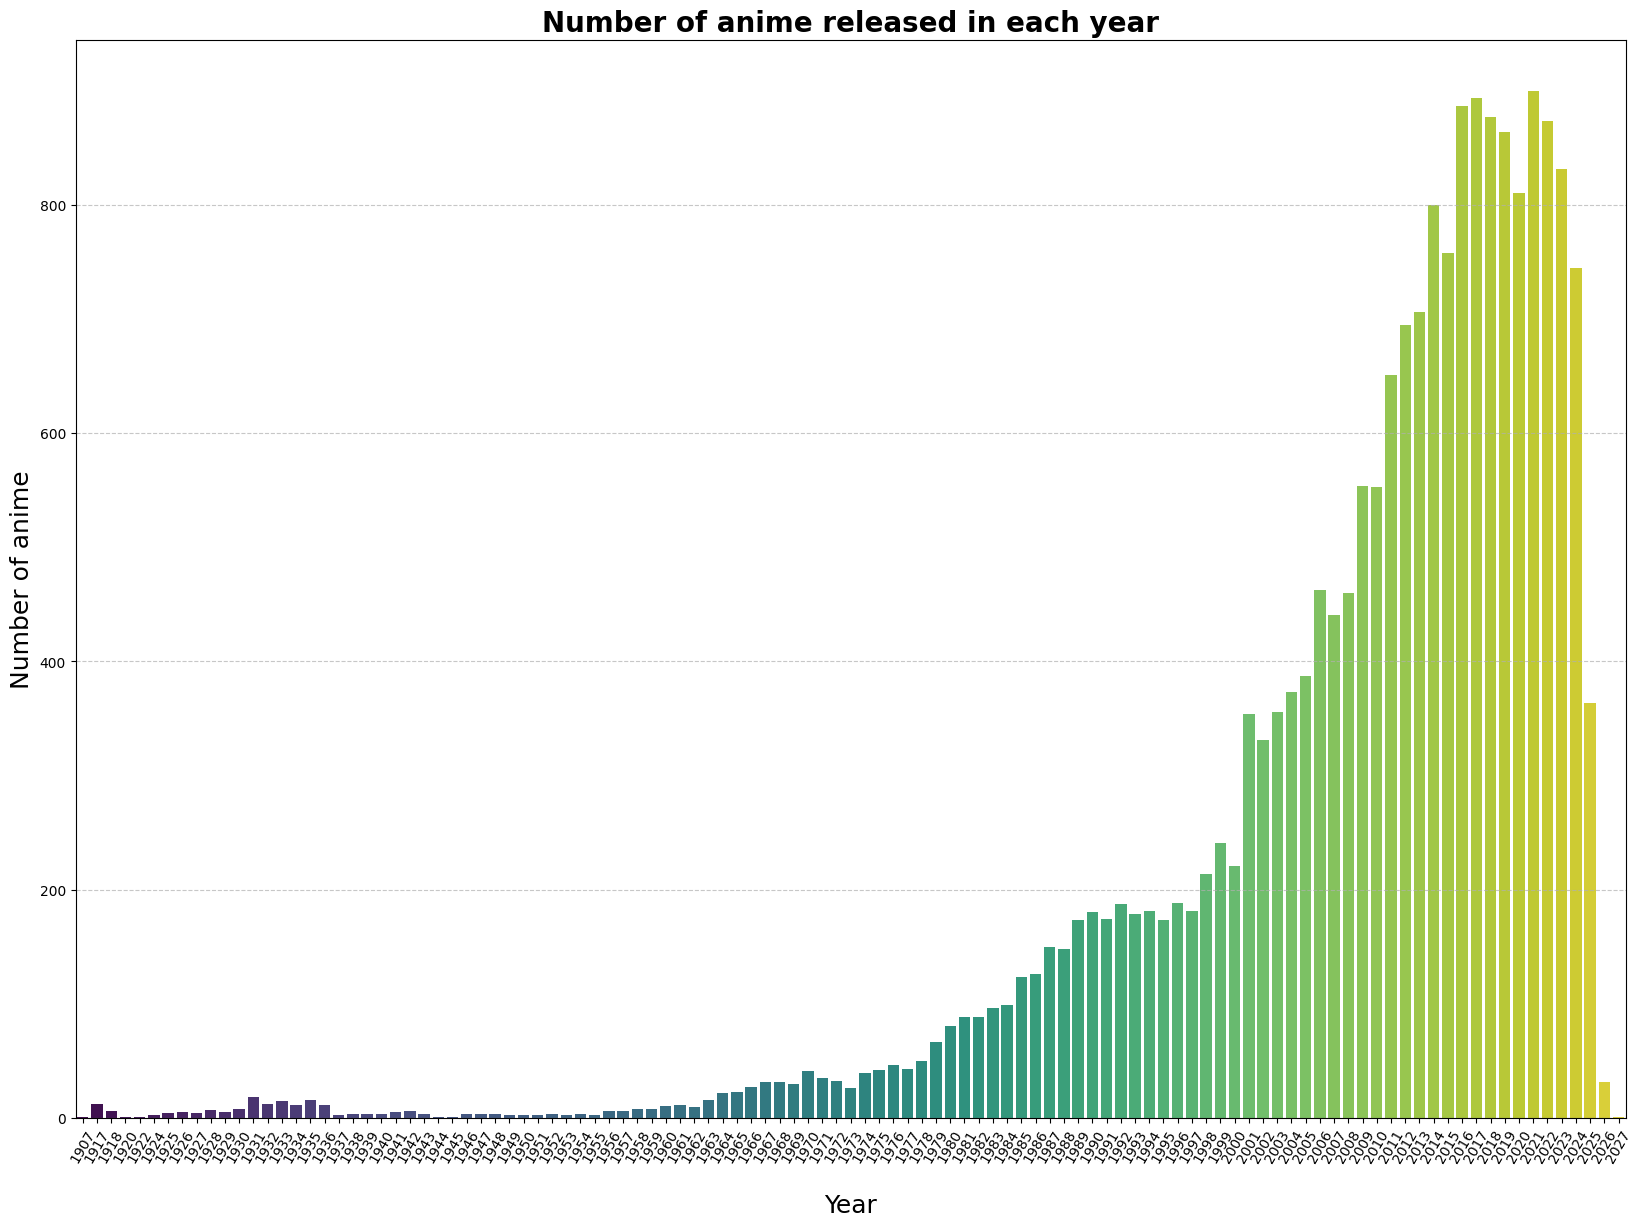

In [31]:
# Analysis of the number of anime released in individual years

df_year = df_analize[df_analize['year'] > 0]
anime_per_year = df_year['year'].value_counts().sort_index()

plt.figure(figsize=(20, 14))
sns.barplot(x=anime_per_year.index, y=anime_per_year.values, palette='viridis')
plt.title('Number of anime released in each year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Number of anime', fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


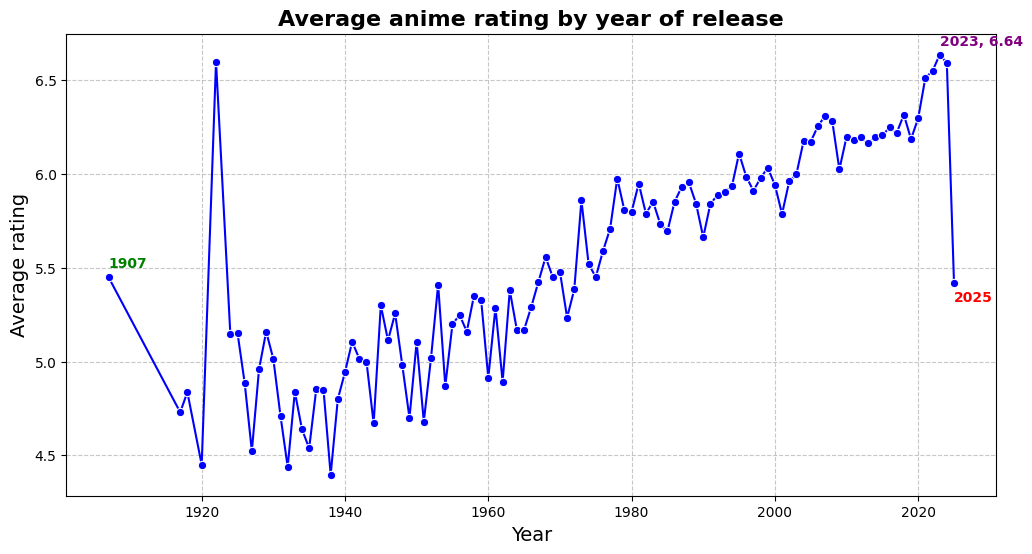

In [32]:
# Line chart of average ratings by release year
df_year_score= df_analize[df_analize['year'] > 0].groupby('year')['score'].mean().reset_index()
df_year_score = df_year_score[df_year_score['year'] <= 2025]  
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='score', data=df_year_score, marker='o', color='blue')
plt.title('Average anime rating by year of release', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average rating', fontsize=14, )
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
first = df_year_score.iloc[0]
last = df_year_score.iloc[-1]
max_row = df_year_score.loc[df_year_score['score'].idxmax()]
plt.text(first['year'], first['score'] + 0.05, f"{int(first['year'])}", color='green', fontweight='bold')
plt.text(last['year'], last['score'] - 0.1, f"{int(last['year'])}", color='red', fontweight='bold')
plt.text(max_row['year'], max_row['score'] + 0.05, f"{int(max_row['year'])}, {max_row['score']:.2f}", color='purple', fontweight='bold')

plt.show()

### Conclusions – Point 4: Analysis of trends over time

### Number of anime over time
The graph showing the number of anime released indicates that **the highest number of productions were created between 2015 and 2024**, reflecting the boom in anime popularity over the last decade, both in Japan and globally.  
In **2019, there is a noticeable decline**, likely caused by the **COVID-19 pandemic**, which disrupted the production and release schedules of many titles.  

The first anime in the collection dates back to **1917**, which corresponds to the beginnings of Japanese animation.  
An unusual anomaly are the titles assigned to the year **2026**, which probably indicate **planned releases** and have been included in the database as future projects.

### Average ratings over time  
An analysis of average ratings by year shows that:  
- **The highest average rating (6.64)** appears in **2023**. This may be due to the fact that new productions are very popular and quickly receive high marks from fans.  
- Between **1920 and 1940**, there is an anomaly – for example, in **1922** there is a title called *Katei Sekken SPECIAL*, whose presence in the database may be a data error or an example of a very niche, hard-to-find production.  
- Overall, the graph shows an **upward trend in ratings over time** – newer productions are rated better. This may be due to:
- improvements in animation quality and technology,
- better accessibility thanks to streaming platforms,  
  - the global popularization of anime, which attracts a larger audience and “enthusiastic” reviewers.  
- **The decline in 2025** is most likely related to **incomplete data** (the year is still ongoing, and the database does not include all premieres).  

**Summary:**  
Anime production increased significantly after 2010, peaking in the last decade. The COVID-19 pandemic in 2019 and the lack of complete data for 2025 explain the noticeable declines. Ratings show a gradual increase in quality over time, with 2023 bringing a record high average rating. The presence of titles from future years (e.g., 2026) and older anomalies (e.g., from 1922) suggests that the database contains both announcements and unusual historical entries.


## 5. Analysis of genres (`genres`)

In [33]:
df_unpacked_generes = df_analize.explode('genres')
#Preesented top 10 most common genres
df_unpacked_generes.value_counts('genres').sort_values(ascending=False).head(10)


genres
Comedy           6902
Action           5387
Fantasy          4714
Adventure        3709
Sci-Fi           3255
Drama            2836
Romance          2218
Hentai           1602
Supernatural     1536
Slice of Life    1437
Name: count, dtype: int64

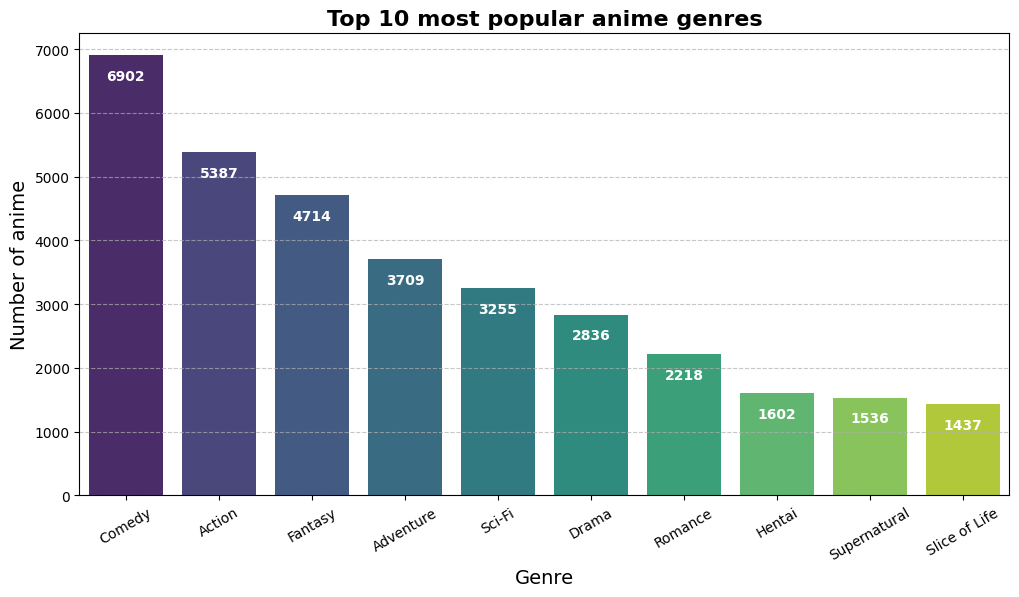

In [34]:
# Bar chart of the top 10 most popular anime genres
plt.figure(figsize=(12, 6))
top10_genres = df_unpacked_generes['genres'].value_counts().head(10)
ax = sns.barplot(x=top10_genres.index, y=top10_genres.values, palette='viridis')
for x in ax.containers:
    ax.bar_label(x, fontsize=10, color='white', label_type='edge', padding=-20, fontweight='bold')
plt.title('Top 10 most popular anime genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of anime', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30)
plt.show()

In [35]:
# Average score for each anime genre
df_unpacked_generes[df_unpacked_generes['score'] > 0].groupby('genres')['score'].mean().sort_values(ascending=False).drop(['Award Winning', 'Avant Garde'])

genres
Suspense         6.984730
Mystery          6.916719
Romance          6.798568
Drama            6.706820
Action           6.657565
Supernatural     6.649475
Gourmet          6.569943
Girls Love       6.548793
Sports           6.548418
Adventure        6.547220
Boys Love        6.535187
Fantasy          6.518730
Ecchi            6.456671
Sci-Fi           6.433930
Comedy           6.346576
Slice of Life    6.235599
Erotica          6.176029
Horror           6.115550
Hentai           5.766029
Name: score, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


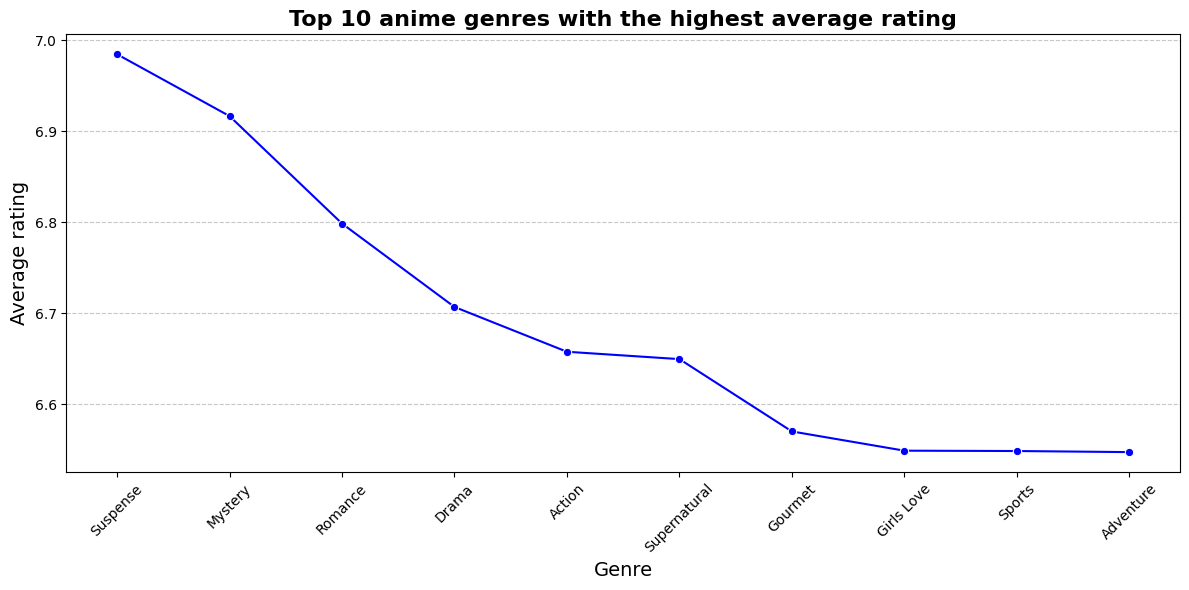

In [36]:
# Line chart of average scores for the top 10 anime genres
df_genres_lineplot = df_unpacked_generes[df_unpacked_generes['score'] > 0].groupby('genres')['score'].mean().sort_values(ascending=False)

df_genres_lineplot_cleared = df_genres_lineplot[~df_genres_lineplot.index.to_series().str.contains("Award Winning", na=False)]

top10_genres = df_genres_lineplot_cleared.head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(x=top10_genres.index, y=top10_genres.values, marker='o', color='blue')
plt.title('Top 10 anime genres with the highest average rating', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusions – Point 5: Genre analysis  

### Most popular genres  
An analysis of frequency shows that the most commonly produced anime genres are:  
1. **Comedy** – the clear leader in terms of number of titles,  
2. **Action**,  
3. **Fantasy**.  

These are genres that are easy to combine with other themes, enjoy mass popularity, and have high commercial appeal.  

### Top-rated genres  
After filtering out titles without a rating (score > 0) and excluding metatags (*Award Winning*, *Avant Garde*), the highest average ratings were obtained by:  
- **Suspense** (~6.98),  
- **Mystery** (~6.92),  
- **Romance** (~6.80),  
- **Drama** (~6.71),  
- **Action** (~6.66).  

These genres are characterized by a strong emphasis on plot and narrative (*Suspense*, *Mystery*, *Drama*) or are very popular with mass audiences (*Action*).  

### Summary of the chart  
The chart “Top 10 anime genres with the highest average rating” shows that the differences in average ratings between genres are relatively small (about 0.3 points). This means that most genres remain within a similar range of quality, but drama and mystery series stand out with slightly higher ratings. 


**General summary:**  
Most productions are in the **Comedy, Action, and Fantasy** genres, but the highest average ratings are given to anime in the **Suspense** and **Mystery** genres. This shows that popularity (number of titles) does not always go hand in hand with quality – viewers rate series with a strong plot and narrative the highest, and not necessarily those in the most numerous categories.


## 6. Series length analysis (`episodes`)

In [37]:
# Correlation between the number of episodes and the score
df_analize.groupby('episodes')['score'].mean().sort_values(ascending=False).head(10)

episodes
123     8.68
1132    8.66
157     8.55
201     8.43
237     8.34
500     8.29
1164    8.26
291     8.16
220     8.03
234     8.00
Name: score, dtype: float64

In [38]:
# Correlation between the number of episodes and the score presented in table form
df_analize[['episodes', 'score']].corr()

,episodes,score
episodes,1.000000,0.029049
score,0.029049,1.000000


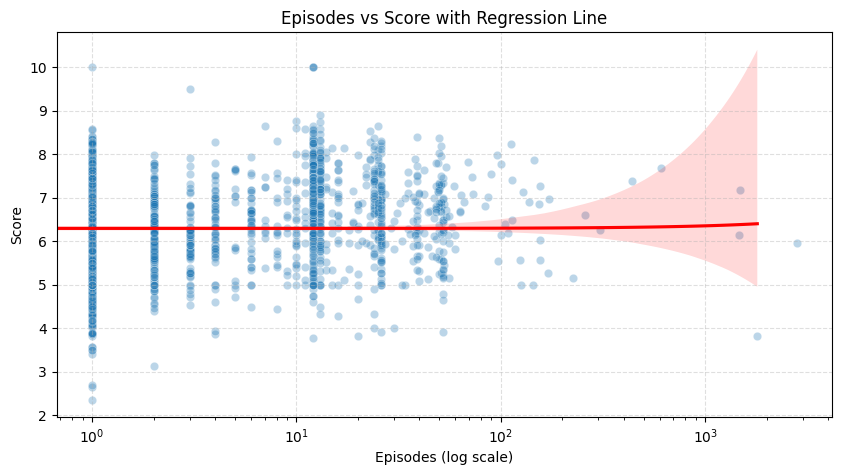

In [39]:
# Visualization of the correlation between the number of episodes and the score with a regression line
df_score_without_nan_episodes = df_analize[df_analize['score'] > 0]


plt.figure(figsize=(10,5))


sns.scatterplot(
    x='episodes', y='score',
    data=df_score_without_nan_episodes.sample(min(len(df_score_without_nan_episodes), 2000)),
    alpha=0.3  
)


sns.regplot(
    x='episodes', y='score',
    data=df_score_without_nan_episodes.sample(min(len(df_score_without_nan_episodes), 2000)),
    scatter=False, line_kws={'color':'red'}
)

plt.xscale('log')
plt.xlabel('Episodes (log scale)')
plt.ylabel('Score')
plt.title('Episodes vs Score with Regression Line')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


### Conclusions – Point 6: Analysis of series length (episodes)

### Relationship between number of episodes and ratings
- The correlation between the number of episodes and ratings is **very weak** – the length of the series itself does not significantly affect the ratings given by viewers.  
- The scatter plot (with a logarithmic scale for episodes) shows that most anime fall within the range of **1–50 episodes**, and ratings in this range vary greatly.  
- The regression line indicates a **slight upward trend** – average ratings increase slightly with the number of episodes, but the effect is marginal (approx. 0.1–0.2 points difference) and subject to considerable uncertainty.  
- In other words: **both short and long series can be rated very highly or very poorly**, and the number of episodes alone does not determine quality.

### Long series
- The longest series have **hundreds or even thousands of episodes** (e.g., long-running television productions).  
- Their average ratings are usually **moderate**—despite the impressive number of episodes, they do not dominate the rankings of the best-rated anime.  
- This is due to the fact that in long productions, there are fluctuations in quality between seasons and fillers, which lowers the average rating.  


**General summary:**  
Most anime series are short (up to 50 episodes), and the number of episodes **is not a key factor** in the rating. There is a slight upward trend – longer series tend to be rated slightly better – but the effect is weak and statistically insignificant. The longest productions are a special phenomenon, but they do not stand out with exceptionally high ratings.


## 7. Analysis of relationships between variables

In [40]:
# Correlation analysis between numerical columns
df_analize.corr(numeric_only=True)

,animeID,year,score,episodes,sequel
animeID,1.000000,-0.073840,-0.499777,-0.021570,-0.091083
year,-0.073840,1.000000,0.209758,0.004004,-0.116914
score,-0.499777,0.209758,1.000000,0.029049,0.143403
episodes,-0.021570,0.004004,0.029049,1.000000,0.014531
sequel,-0.091083,-0.116914,0.143403,0.014531,1.000000


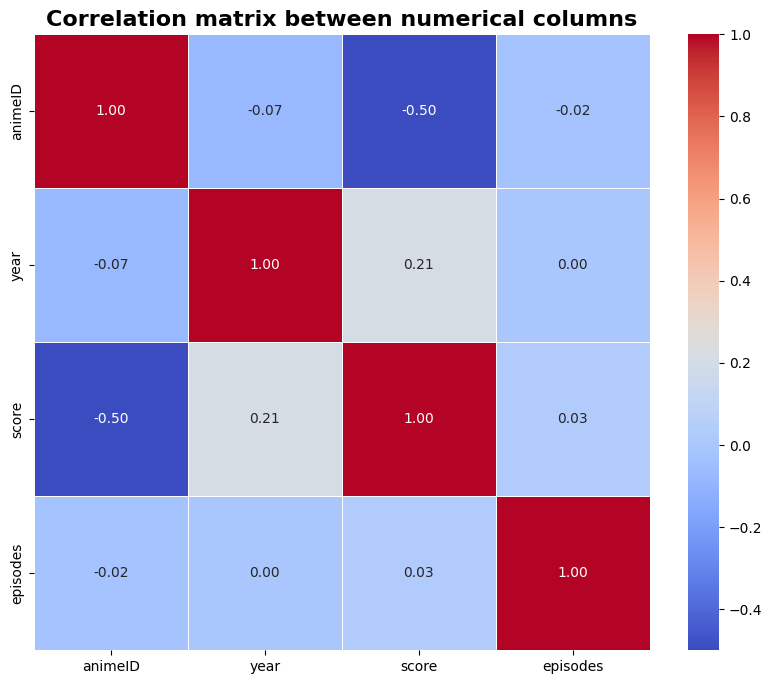

In [41]:
# Correlation matrix between numerical columns with visualization
num = df_analize.select_dtypes(include=np.number)
corr = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation matrix between numerical columns', fontsize=16, fontweight='bold')
plt.show()

### Conclusions – Point 7: Relationships between variables

### Numerical correlations
- The strongest positive correlation is between **year of release** and **score** (~0.20). This indicates a slight tendency for newer productions to receive higher scores.  
- The correlation between **number of episodes** and **rating** is very weak (~0.05), practically insignificant – the length of the series does not significantly affect the average rating.  
- Other correlations between numerical variables are also weak, suggesting that **viewer ratings are not a simple function of basic metadata** (year, length, number of episodes).

### Visualizations of relationships  
- The **“Episodes vs. Score” scatter plot** confirmed the lack of a significant relationship – short and long series can be rated equally well or poorly.
- The **“Year vs. Score” trend** shows a slight increase in ratings over time, which may be related to the growing popularity of anime, better animation technology, and greater global availability.  
- The distribution of ratings for different **types of anime** (TV, OVA, Movie, Special, ONA) showed that:
- TV has the highest median and the greatest diversity,
- OVA are rated the lowest,
- the other types fall between them.


**General summary:**  
The relationships between variables are generally weak—ratings do not depend significantly on the number of episodes or the year of release. However, there is a slight trend toward better ratings for newer productions and an advantage for television series over other types. Ultimately, the quality of anime as judged by viewers depends more on content and production than on simple descriptive metadata.


## 8. “Top 10” visualizations

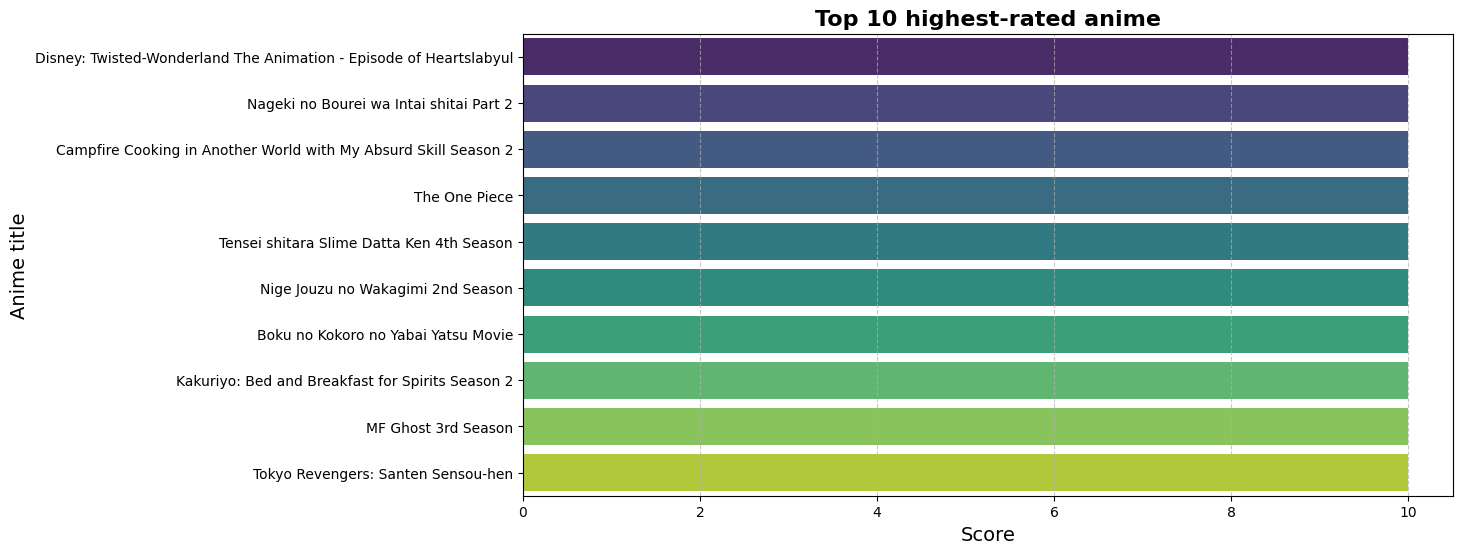

In [42]:
# Top 10 highest-rated anime - bar chart
top_10_anime = df_analize[['title', 'score']].sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='title', data=top_10_anime, palette='viridis')
plt.title('Top 10 highest-rated anime', fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=14)
plt.ylabel('Anime title', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

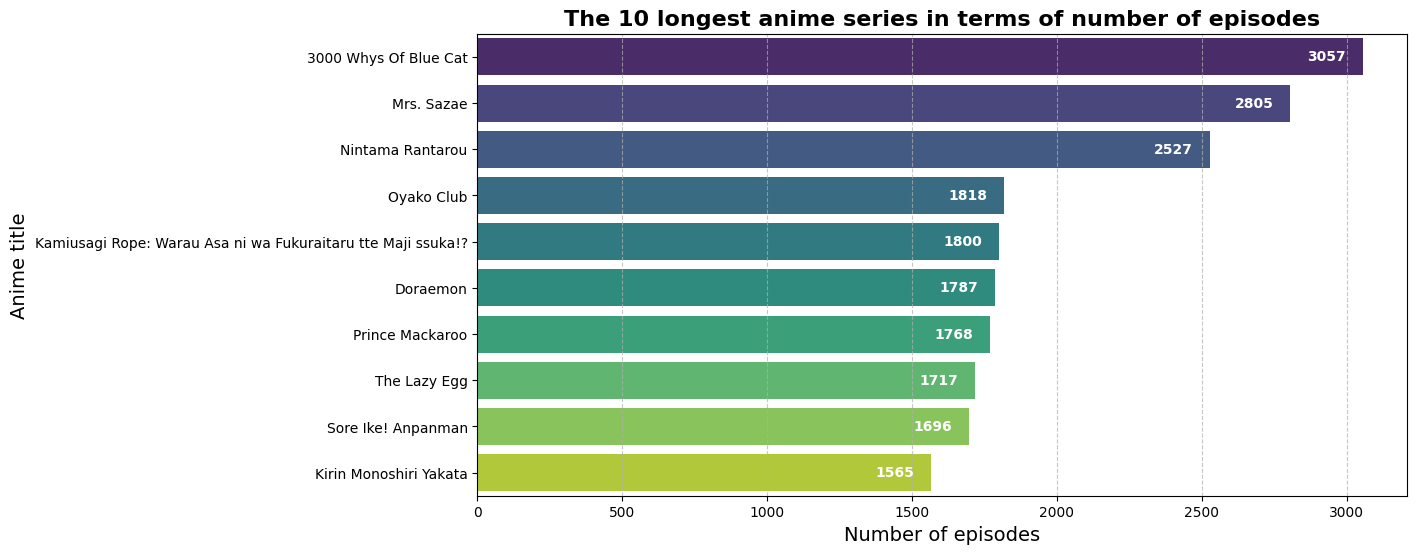

In [43]:
# 10 longest anime series by number of episodes - bar chart
top_longest_anime = df_analize[['title', 'episodes']].sort_values(by='episodes', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='episodes', y='title', data=top_longest_anime, palette='viridis', )
for x in ax.containers:
    ax.bar_label(x, fontsize=10, color='white', label_type='edge', padding=-40, fontweight='bold')
plt.title('The 10 longest anime series in terms of number of episodes', fontsize=16, fontweight='bold')
plt.xlabel('Number of episodes', fontsize=14)
plt.ylabel('Anime title', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

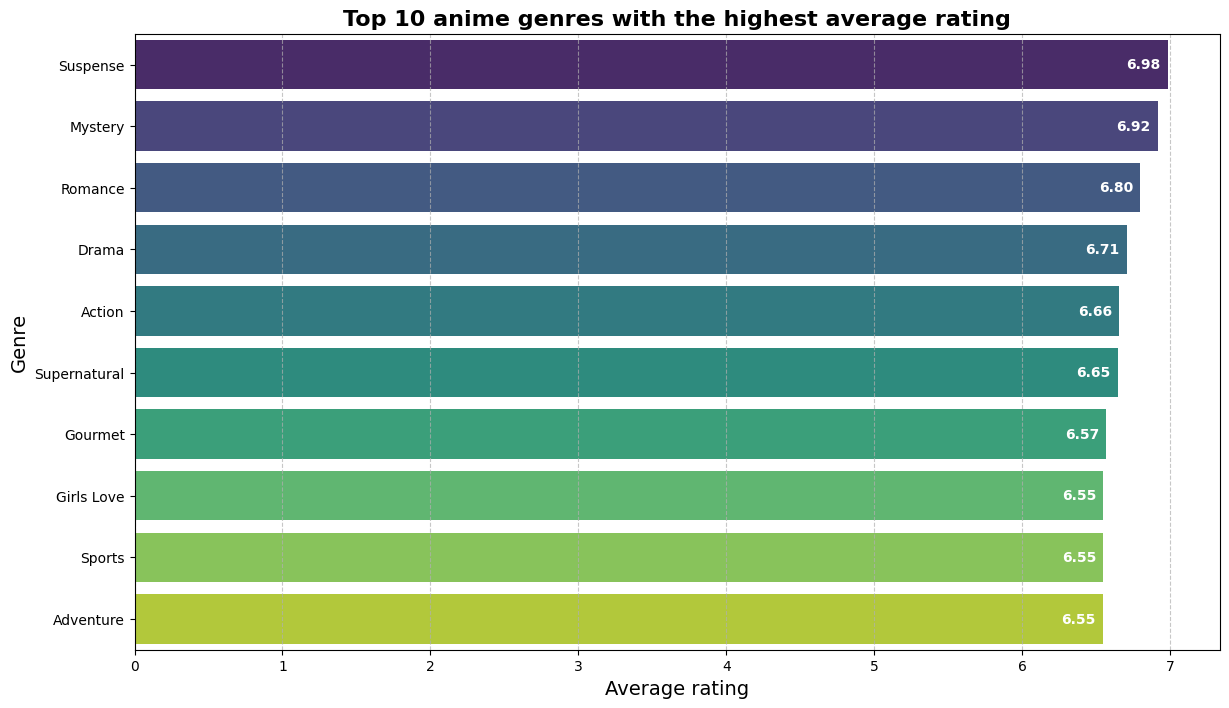

In [44]:
# Top 10 anime genres with the highest average rating - bar chart
df_generes_score = df_unpacked_generes[df_unpacked_generes['score'] > 0].groupby('genres')['score'].agg(['mean', 'count']).reset_index()
top10_best_genres = df_generes_score[~df_generes_score['genres'].str.contains("Award Winning",na=False) & 
                                     ~df_generes_score['genres'].str.contains("Avant Garde",na=False)]
top10_best_genres_cleared = top10_best_genres.nlargest(10, 'mean').nlargest(10, 'mean')
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='mean', y='genres', data=top10_best_genres_cleared, palette='viridis')
for x in ax.containers:
    ax.bar_label(x, fontsize=10, color='white', label_type='edge', padding=-30, fontweight='bold', fmt='%.2f')  
plt.title('Top 10 anime genres with the highest average rating', fontsize=16, fontweight='bold')
plt.xlabel('Average rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 9. Summary and conclusions

##  Final conclusions – Summary of the analysis

1. **Data gaps and data set preparation**  
   - There were gaps in many columns, which were standardized:
- in numerical columns (`score`, `year`), missing values were marked as **0**  
       (with the proviso that they were omitted from the analysis of the ratings so as not to lower the averages),  
     - in descriptive columns (`alternative_title`), missing entries were replaced with the value **“No information”**.  
   - Data types were converted:  
     - `year` → **int64**,  
     - `score` → **float64**,  
     - `episodes` → **int64**,  
     - `genres` and `genres_detailed` → converted from strings to lists, then exploded for further analysis.  
   - **Duplicates were left in the dataset** because they could correspond to different variants of the same anime or entries from different sources.  
   - The **`mal_url`** and **`image_url`** columns were removed because they had no analytical value (they only contained links to images and source pages).  


2. **Rating statistics (Score)**  
   - Most anime fall within the range of **6.5–7 points**, which means that titles are generally rated positively.  
   - The highest median scores are for **TV series (~6.7)**, and the lowest for **OVA (~6.0)**.  
   - The differences between the other types are small, but TV series stand out as having the greatest variation in quality.  

3. **Trends over time**  
   - Anime production has increased rapidly over the last decade (peaking between 2015 and 2024).  
   - In 2019, there was a noticeable decline in the number of titles, which can be linked to the COVID-19 pandemic.  
   - Ratings show a slight upward trend – **newer productions are rated higher**, with a record average in 2023.

4. **Genre analysis**  
   - Most popular genres (by number): **Comedy, Action, Fantasy**.  
   - Highest-rated genres: **Suspense (~6.98)** and **Mystery (~6.92)**, followed by **Romance** and **Drama**.  
   - Popularity (number of titles) does not always go hand in hand with ratings – viewers rate genres focused on plot and intrigue higher.  

5. **Series length (Episodes)**  
   - Most anime are short series (up to 50 episodes).  
   - The correlation between the number of episodes and ratings is **very weak**, although there is a slight upward trend – longer series tend to be rated slightly better, but the effect is not significant.  
   - The longest productions (hundreds or even thousands of episodes) have moderate average ratings.

6. **Relationships between variables**  
   - Correlations between metadata (year, episodes, type) and ratings are **weak**.  
   - The strongest correlation is **year–rating (r≈0.20)**, confirming a slight trend of higher ratings for newer anime.  



**General summary:**  
The collection required thorough preparation (filling in gaps, changing types, removing duplicates, discarding unnecessary columns). After analysis, it turned out that although most productions are made in popular genres (**Comedy, Action, Fantasy**), the highest rated series are drama and mystery (**Suspense, Mystery**). TV series are rated the highest, although they show the greatest variation in quality. The number of episodes has no significant impact on the rating, and trends over time show a gradual increase in ratings along with the growing popularity of anime around the world.